In [ ]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
filename = "map.jpg"
imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(imgbgr, cv2.COLOR_RGB2GRAY)
img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

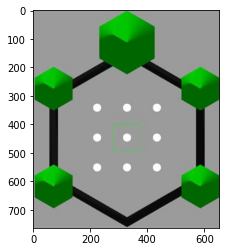

In [ ]:
plt.imshow(imgbgr)

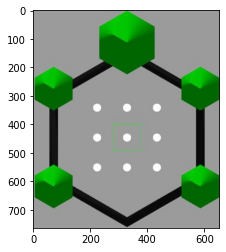

In [ ]:
plt.imshow(img_rgb)

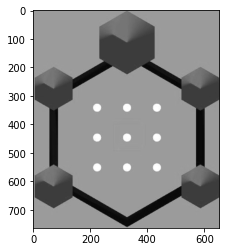

In [ ]:
plt.imshow(img_grey, cmap="gray")

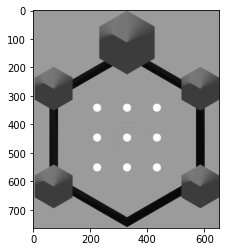

In [ ]:
plt.imshow(img_gray, cmap="gray")

In [ ]:
def binary_thresh(image, threshold = 150, max_value=255):
  """
  param: image: image being processed
  param: threshold: threshold value
  param: max_value: value to set to pixels that are greater than threshold
  return binary image
  """
  img = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if threshold - 10 <= image[i][j] <= threshold + 10:
        img[i][j] = max_value
      else:
        img[i][j] = 0
  return img

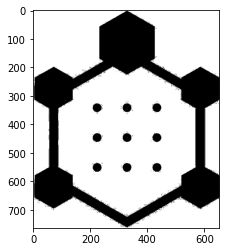

In [ ]:
thresh = binary_thresh(img_gray)
plt.imshow(thresh, cmap="gray")

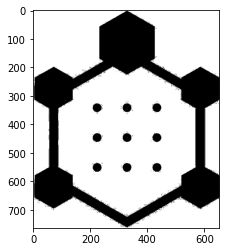

In [ ]:
_, thresh2 = cv2.threshold(thresh, 250, 255, cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap="gray")

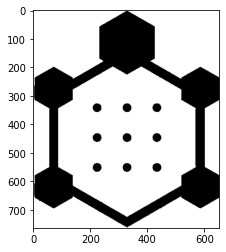

In [ ]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="gray")

In [ ]:
# cv2.imwrite("gray.jpg", closing)

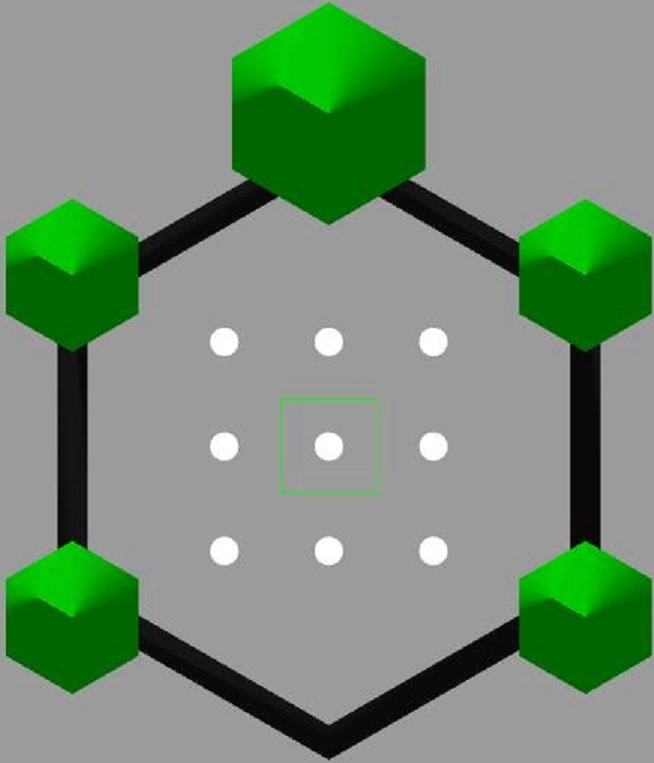

In [ ]:
cv2_imshow(img_rgb)

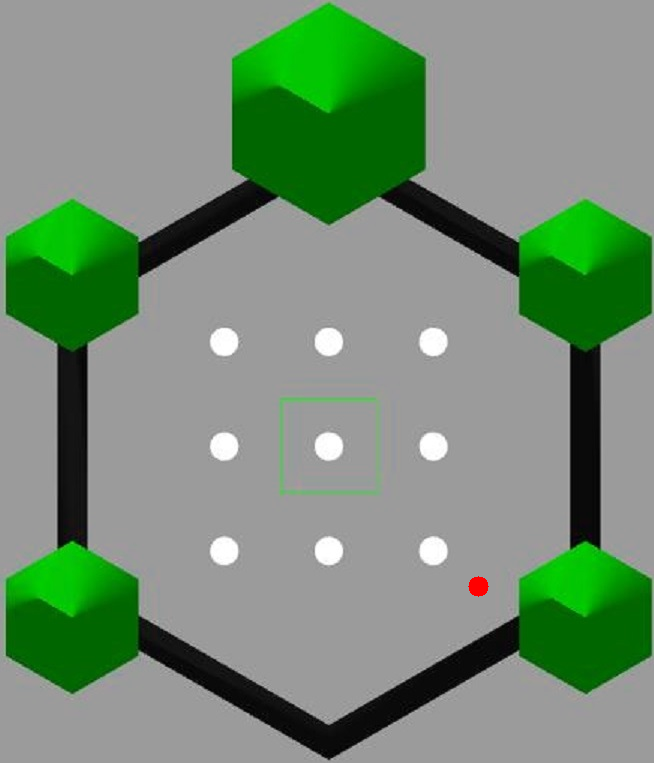

In [ ]:
e = closing.shape

e = tuple(np.ceil([(e[1]+2)/2, (e[0]/2)+64]).astype('int'))
c = e[0] + 150, e[1] + 140

agent_radius = 10
agent_thickness = -1
agent_color = (0, 0, 255)
thickness = agent_thickness

img_ = cv2.circle(img_rgb.copy(), c, radius=agent_radius, color=agent_color, thickness=thickness)
cv2_imshow(img_)

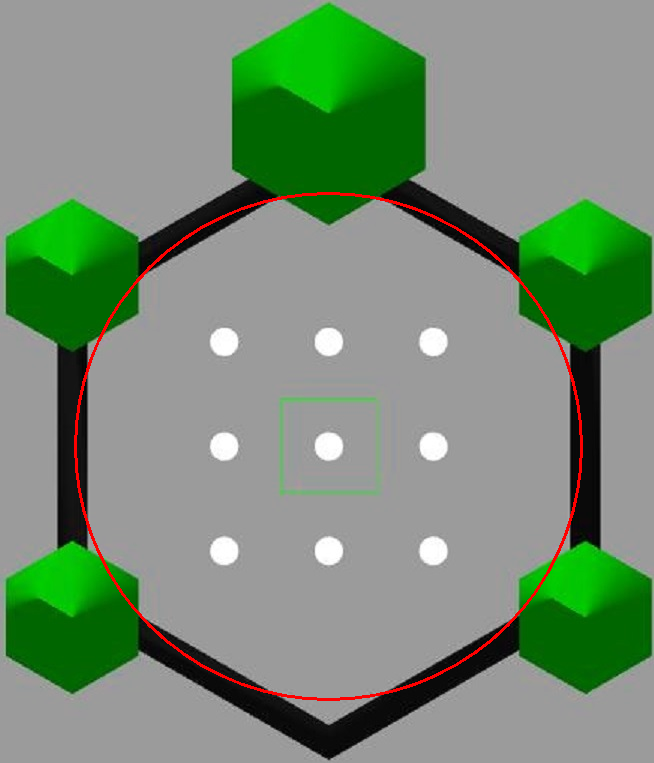

In [ ]:
agent_radius = e[0] - 75
thickness = 2

img_2 = cv2.circle(img_rgb.copy(), e, radius=agent_radius, color=agent_color, thickness=thickness)
cv2_imshow(img_2)

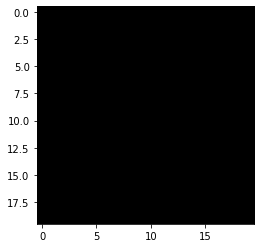

In [ ]:
x, y = e
agent_radius = 10
x0 = x - agent_radius
x1 = x + agent_radius
y0 = y - agent_radius
y1 = y + agent_radius

square = closing[y0:y1,x0:x1]
# cv2_imshow(square)

plt.imshow(square, cmap="gray")

In [ ]:
np.sum(square)

0

In [ ]:
square_ = square/255 # normalize to 1

In [ ]:
np.sum(square_)

0.0

In [ ]:
len(square_.flatten())

400